In [4]:
import siganalysis as sa
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import math
from scipy.fftpack import *
import scipy
import pandas as pd

In [19]:
def stft(x, fftsize=256, overlap=2):   
    hop = fftsize // overlap
    w = scipy.hanning(fftsize+1)[:-1]
    
    return np.array([np.fft.rfft(w*x[i:i+fftsize]) for i in range(0, len(x)-fftsize, hop)])

def feature(x, fftsize=256, overlap=2):
    meanamp = []
    maxamp = []
    minamp = []
    stdamp = []
    energyamp = []
    hop = fftsize // overlap
    for i in range(0, len(x)-fftsize, hop):
        meanamp.append(np.array(np.mean(x[i:i+fftsize])))
        maxamp.append(np.array(np.max(x[i:i+fftsize])))
        minamp.append(np.array(np.min(x[i:i+fftsize])))
        stdamp.append(np.array(np.std(x[i:i+fftsize])))
        energyamp.append(np.array(np.sum(np.power(x[i:i+fftsize],2))))
             
                  
    return meanamp ,maxamp ,minamp,stdamp,energyamp

In [27]:
def compute_feats(data, out_fname):
    time, x, y, z, label, str_label = np.array(data[0]), np.array(data[1]), np.array(data[2]), np.array(data[3]), np.array(data[4]), np.array(data[5])
    mpre = x*x+y*y+z*z
    m = np.sqrt(mpre)
    m_smooth = np.zeros(len(m))
    m_smooth = m;


    for i ,val in enumerate(m_smooth[2 : (len(m_smooth) -2)]):
        m_smooth[i] = (m_smooth[i-2] + m_smooth[i-1] +m_smooth[i] + m_smooth[i+1] + m_smooth[i+2])/5
        m = m_smooth

    plt.plot(m)
    plt.show()

    ####################################################################################
    stft_signal = stft(m)
    energy_signal = []

    for i, amp in enumerate(stft_signal):
        energy_signal.append(np.sum(np.power(abs(stft_signal[i]),2)))

    ####################################################################################
    valmean ,valmax,valmin,valstd,valenergy= feature(m)
    diff = np.subtract(valmax,valmin)

    plt.plot(m)
    plt.xlabel('Freq')
    plt.ylabel('Energy')
    plt.title('Sitting')
    plt.show()


    ####################################################################################
    for i ,val in enumerate(valmean):
        saveFile = open ('results/' + out_fname,'a')
        saveFile.write(str(valmean[i]) + ',' +str(valmax[i]) + ',' + str(valmin[i]) + ',' + str(valstd[i]) + ',' + str(valenergy[i])+','+ str(energy_signal[i]) + ',' + str(label[0]) )
        saveFile.write('\n')

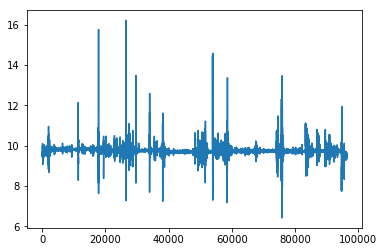

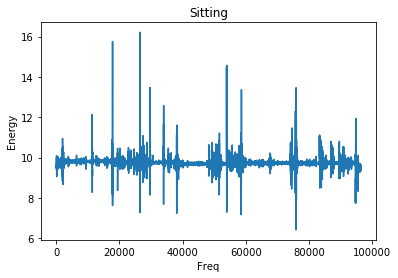

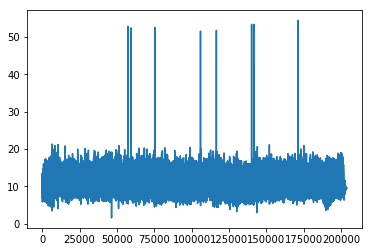

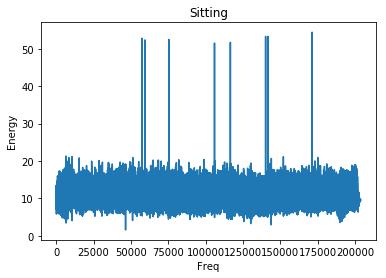

In [29]:
data = pd.read_csv('Data/csv/sitting/accelerometer.csv', header=None)
compute_feats(data, 'sitting')

data = pd.read_csv('Data/csv/walking/accelerometer.csv', header=None)
compute_feats(data, 'walking')